<a href="https://colab.research.google.com/github/vasanana/weather-predictive-model/blob/main/Weather_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective

1. Is there a relationship between humidity and temperature?
2. What about between humidity and apparent temperature?
3. Can you predict the apparent temperature given the humidity?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#Data Understanding

In [4]:
url = 'https://raw.githubusercontent.com/vasanana/weather-predictive-model/main/weatherHistory.csv'
weather = pd.read_csv(url)
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


#Exploratory Data Analysis

Focusing on Temperature, Apperent Temperature, and Humidity features

In [7]:
weather_df = weather[[
    'Temperature (C)',
    'Apparent Temperature (C)',
    'Humidity'
]]

weather_df.columns = ['Temperature (C)', 'Apparent Temperature (C)','Humidity']
weather_df.head()

,Temperature (C),Apparent Temperature (C),Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86
2,9.377778,9.377778,0.89
3,8.288889,5.944444,0.83
4,8.755556,6.977778,0.83


Check missing value

In [8]:
missing_value = weather_df.isnull().sum()
print(missing_value)

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64


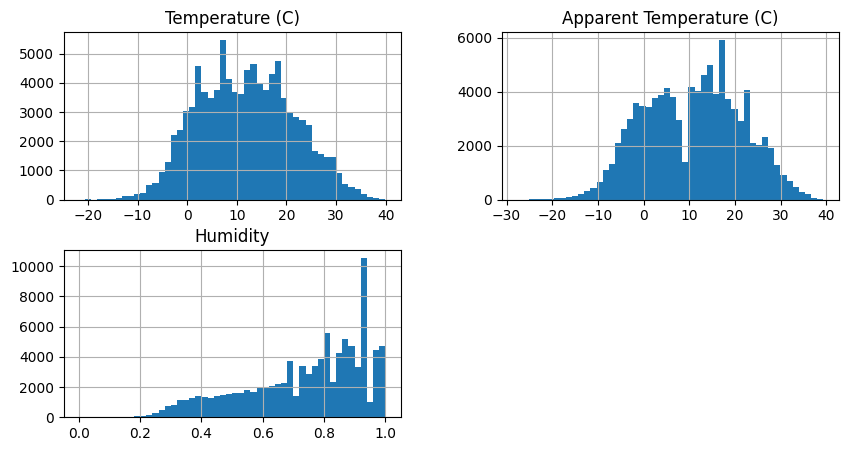

In [9]:
weather_df.hist(bins=50, figsize=(10,5))
plt.show()

Kesimpulan:
1. Distribusi Humidity miring ke kiri (left skew) yang akan berpengaruh pada model
2. Distribusi Temperature dan Apparent Temperature bersifat normal

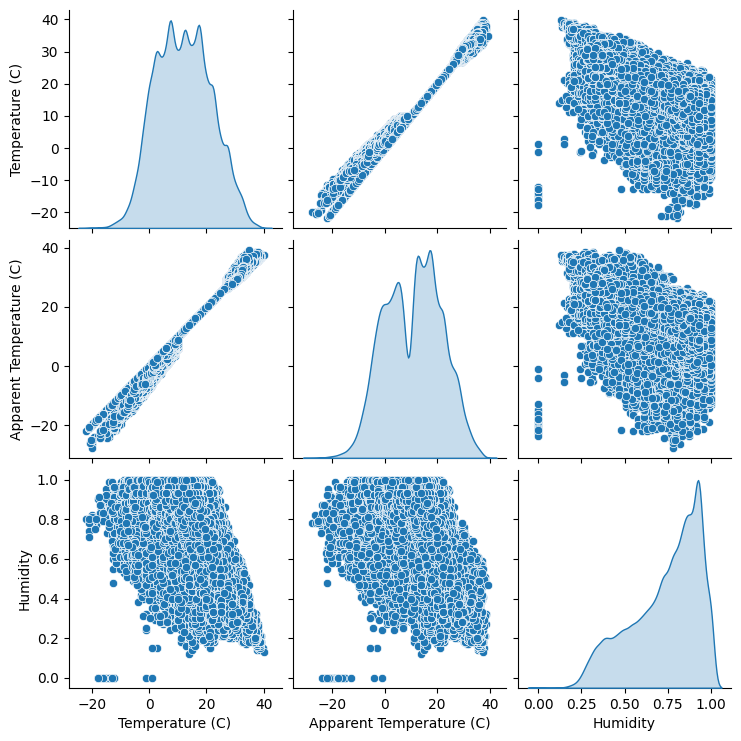

In [10]:
sns.pairplot(weather_df, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix')

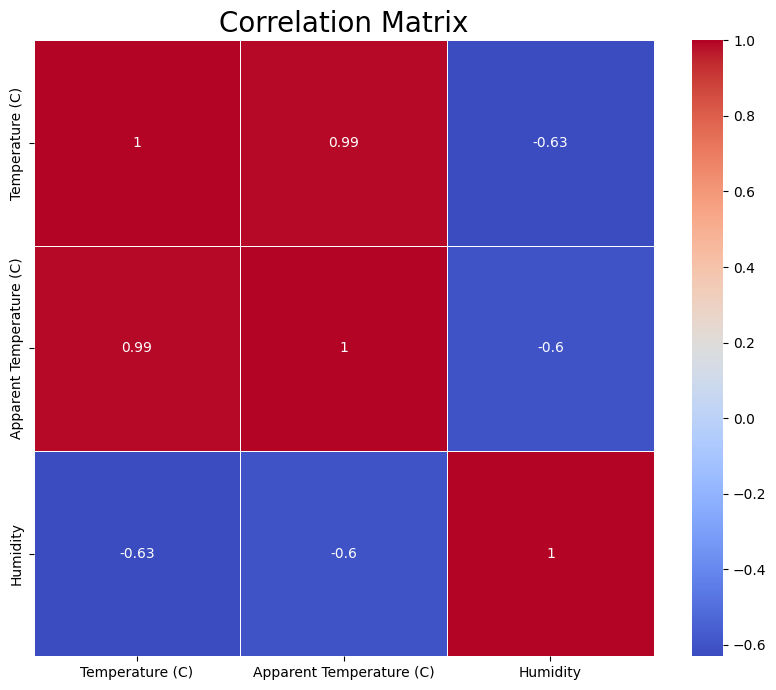

In [11]:
#correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = weather_df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

Kesimpulan:
1. Humadity berkolerasi negatif dengan Temperature (corr=-0.63). Saat Temperature meningkat, Humadity memiliki kecenderungan untuk menurun
2. Begitu pula hubungan Humadity dengan Apparent Temperature (corr=-0.6). Saat Apparent Temperature meningkat, Humadity memiliki kecenderungan untuk menurun

#Data Preparation

In [12]:
from sklearn.model_selection import train_test_split

x = np.array(weather_df['Humidity']).reshape(-1,1)
y = np.array(weather_df['Apparent Temperature (C)']).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=50)

In [13]:
print(f'Total data of sample in whole dataset: {len(x)}')
print(f'Total data of sample in train dataset: {len(x_train)}')
print(f'Total data of sample in test dataset: {len(x_test)}')

Total data of sample in whole dataset: 96453
Total data of sample in train dataset: 77162
Total data of sample in test dataset: 19291


#Model Development

##Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(x_train, y_train)
models.loc['train_mse', 'lr'] = mean_squared_error(y_pred = lr.predict(x_train), y_true=y_train)

In [16]:
# acc = lr.score(x_test, y_test)
# print("Linear Regression Model accuracy: ", acc)

##K-Nearest Neighbor

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['LinearRegression','KNN', 'RandomForest', 'Boosting'])

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred = knn.predict(x_train), y_true=y_train)

##Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=50, n_jobs=-1)
RF.fit(x_train,y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)

<ipython-input-18-b07a5ed4da69>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train,y_train)


##Boosting Algorithm

In [19]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.5, random_state=50)
boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Model Evaluation

In [27]:
#evaluasi model dengan MSE

mse = pd.DataFrame(columns=['train','test'], index=['lr', 'KNN','RF','Boosting'])
model_dict = {'lr': lr, 'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3

mse

,train,test
lr,0.07265,0.073781
KNN,0.072992,0.07411
RF,0.06742,0.069011
Boosting,0.075966,0.077033


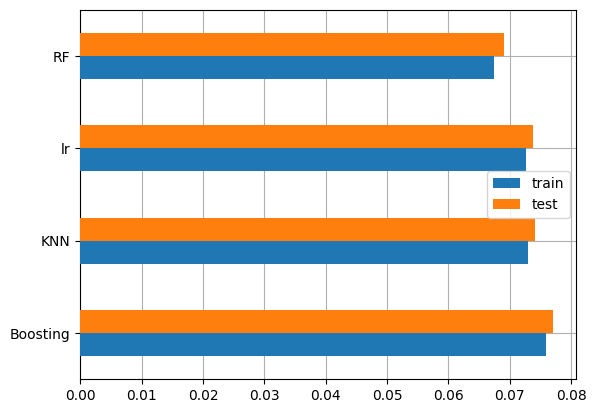

In [29]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Kesimpulan:
1. Nilai test pada Linear Regression (lr), K-Nearest Neighbors (KNN), dan Boosting memberikan hasil yang cukup tinggi dibanding nilai train, hal tersebut mengindikasikan bahwa model mengalami sedikit overfitting
2. Model Random Forest (RF) memberikan hasil MSE yang paling kecil sehingga dapat disimpulkan bahwa model ini memiliki perfoma yang paling baik